#### spike-in normalization

In [11]:
# os.chdir("/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/spikeIn/")
os.chdir("/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/spikeIn/")
count = "NC_vs_T.count"
######## S2 
# factor_dict = {
#     "NC_input": 0.039071675,
#     "NC_m6A": 0.013320398,
#     "NC2_input": 0.061163403, 
#     "NC2_m6A": 0.013701891,
#     "T1_input": 1,
#     "T1_m6A": 0.012215453,
#     "T2_input": 0.009044105,
#     "T2_m6A": 0.007388404,
#     "T3_input": 0.016003427,
#     "T3_m6A": 0.012871767
# }
# factor_dict = {
#     "NC_input": 0.863905325,
#     "NC_m6A": 1,
#     "T1_input": 1,
#     "T1_m6A": 0.671084988,
#     "T2_input": 0.679295447,
#     "T2_m6A": 0.515515216,
#     "T3_input": 0.6513703,
#     "T3_m6A": 0.644601913
# }
# factor_dict = {
#     "wt1_input": 1,
#     "wt2_input": 0.858099918,
#     "kd1-1_input": 0.974997809,
#     "kd1-2_input": 0.855216341,
#     "kd2-1_input": 0.830163739,
#     "kd2-2_input": 0.794336948,
#     "wt1_m6A": 0.378435641,
#     "wt2_m6A": 0.373886158,
#     "kd1-1_m6A": 0.381022276,
#     "kd1-2_m6A": 0.476827842,
#     "kd2-1_m6A": 0.385362595,
#     "kd2-2_m6A": 0.349309016
# }
####### ssRNA 
factor_dict = {
    "wt1_input": 0.932550089,
    "wt2_input": 0.818148353,
    "kd1-1_input": 1,
    "kd1-2_input": 0.728032102,
    "kd2-1_input": 0.687256001,
    "kd2-2_input": 0.726544622,
    "wt1_m6A": 0.025084579,
    "wt2_m6A": 0.028542808,
    "kd1-1_m6A": 0.026021962,
    "kd1-2_m6A": 0.038729211,
    "kd2-1_m6A": 0.0256155,
    "kd2-2_m6A": 0.023883051
}
df = pd.read_table(count)
col_list = df.columns[3:]
sample_list = sorted(list(set([x.split("_")[0] for x in col_list])))
for sample in sample_list:
    i_m6a, i_input = '%s_m6A'%sample, '%s_input'%sample
    df['%s_m6ALevel'%sample] = (df[i_m6a]*factor_dict[i_m6a]) / (df[i_input]*factor_dict[i_input])
df_sub = df[['#chro','start','end'] + ['%s_m6ALevel'%x for x in sample_list]]
df_sub.to_csv("FPKM_matrix.bed", sep="\t", index=False)
### generate for plot
df['peak'] = df['#chro'] + ":" + df['start'].astype(str) + "-" + df['end'].astype(str)
df_sub = df[['peak'] + ['%s_m6ALevel'%x for x in sample_list]]
df_sub.to_csv("FPKM_matrix.txt", sep="\t", index=False)

#### FPKM normalization

In [24]:
# os.chdir("/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/totalReads/")
os.chdir("/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/")
df = pd.read_table("NC_vs_T.count")

# ### bam stat
count_file = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/bam.count"
# count_file = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/bam.count"
df_c = pd.read_table(count_file, header=None)
# df_c.iloc[:,0] = df_c.iloc[:,0].str.split(".bam").str[0]
count_dict = dict(zip(df_c.iloc[:,0], df_c.iloc[:,1]))
print(count_dict)
###
sample_cols = df.columns[3:].tolist()
# df['peak_len'] = df['peak'].str.split(":").str[1].str.split("-").str[1].astype(int) - df['peak'].str.split(":").str[1].str.split("-").str[0].astype(int)
df['peak_len'] = df['end'] - df['start']
for sample in sample_cols:
    df['%s_rpkm'%sample] = (df[sample] * 1000000000) / (df['peak_len'] * count_dict[sample])
df['peak'] = df['#chro'] + ":" + df['start'].astype(str) + "-" + df['end'].astype(str)
# for case in ['wt','wt2','kd','kd2']:
#     df['%s_m6ALevel'%case] = (df['%s.m6A_rpkm'%case]+1) / (df['%s.input_rpkm'%case]+1)
# sample_list = ['wt1','wt2','kd1-1','kd1-2','kd2-1','kd2-2','pre_wt','pre_wt2','pre_kd','pre_kd2']
sample_list = sorted(list(set([x.split("_")[0] for x in sample_cols])))
for case in sample_list:
    df['%s_m6ALevel'%case] = (df['%s_m6A_rpkm'%case]+1) / (df['%s_input_rpkm'%case]+1)
### txt format
df_final = df[['peak'] + ["%s_m6ALevel" % x for x in sample_list]]
print(df_final.head())
df_final.to_csv("FPKM_matrix.txt", sep="\t", index=False)
### bed format
df_final = df[['#chro', 'start', 'end'] + ["%s_m6ALevel" % x for x in sample_list]]
df_final.to_csv("FPKM_matrix.bed", sep="\t", index=False)

{'kd1-1_input': 28641536, 'kd1-2_input': 31142454, 'kd2-1_input': 24248087, 'kd2-2_input': 24074659, 'kd1-2_m6A': 96370568, 'kd2-1_m6A': 85093260, 'wt1_input': 23452971, 'kd1-1_m6A': 128702240, 'wt2_input': 27208576, 'kd2-2_m6A': 97331100, 'wt1_m6A': 118311220, 'wt2_m6A': 120152621, 'pre_kd2_input': 59254724, 'pre_kd_input': 68023740, 'pre_wt_input': 78164647, 'pre_wt2_input': 46888237, 'pre_kd2_m6A': 117018661, 'pre_kd_m6A': 84298167, 'pre_wt_m6A': 85184165, 'pre_wt2_m6A': 90201519}
                 peak  kd1-1_m6ALevel  kd1-2_m6ALevel  kd2-1_m6ALevel  \
0    chr1:14411-14829        4.517477        4.028199        4.941245   
1  chr1:788751-789941        7.668599        6.787652        9.717649   
2  chr1:791535-792683        6.426144        7.115219        4.850628   
3  chr1:847684-848533        4.939651        5.870561        8.346522   
4  chr1:854814-856396        6.068910        4.357224        5.576829   

   kd2-2_m6ALevel  wt1_m6ALevel  wt2_m6ALevel  
0        4.857550      5

In [12]:
# #### calculate foldChange for each samples
# os.chdir("/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/spikeIn/")
# # os.chdir("/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/")
# in_file = "m6A_level.txt"
# # in_file = "FPKM_matrix.txt2"
# # result_dir = "foldChange"
# result_dir = "m6ALevel"
# os.system("mkdir -p %s" % result_dir)

# df = pd.read_table(in_file)
# for col_x in ['wt1_ratio', 'wt2_ratio']:
# # for col_x in ['pre-wt_m6ALevel','pre-wt2_m6ALevel','wt1_m6ALevel', 'wt2_m6ALevel']:
#     for col_y in ['kd1-1_ratio', 'kd1-2_ratio', 'kd2-1_ratio', 'kd2-2_ratio']:
# #     for col_y in ['pre-kd_m6ALevel', 'pre-kd2_m6ALevel','kd1-1_m6ALevel', 'kd1-2_m6ALevel', 'kd2-1_m6ALevel', 'kd2-2_m6ALevel']:
# #         s1_s2 = "%s/%s" % (col_y.split("_m6ALevel")[0], col_x.split("_m6ALevel")[0])
# #         df[s1_s2] = df[col_y] / df[col_x]
# #         col_list = ['#chro', 'start', 'end', s1_s2]
#         col_list = ['#chro', 'start', 'end', col_x, col_y]
#         df_sub = df[col_list].dropna()
#         df_sub = df_sub[df_sub != np.inf]
#         res = os.path.join(result_dir, "%s_%s.bed" % (col_y, col_x)).replace("_ratio","")
#         df_sub.to_csv(res, sep="\t", index=False)

#### pick out FUS-targets m6As and Non-targets m6As

In [25]:
# os.chdir("/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/spikeIn/")
# os.chdir("/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/totalReads/")
os.chdir("/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/")
# os.chdir("/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/spikeIn/")
os.system("mkdir -p targets")
os.system("mkdir -p non-targets")
###### pick out m6A peak
in_file = "FPKM_matrix.bed"
sample_cols = list(pd.read_table(in_file).columns)[3:]
# m6a_peak = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/peak_calling/merged_peak_MSPC/normalized_metpeak/NC2.bed"
# m6a_peak = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/peak_calling/merged_peak_MSPC/normalized_macs/NC.bed"
# m6a_peak = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/peak_calling/merged_peak_MSPC/NC/ConsensusPeaks.bed"
m6a_peak = "/Charles/project/ASm6A/shFUS/mapping/human/peak/merged_peak_MSPC/wt1/ConsensusPeaks.bed"
###
m6a_bed = "overlapM6A.bed"
os.system("bedtools intersect -a %s -b %s -wa | sort -u > %s" % (in_file, m6a_peak, m6a_bed))
df = pd.read_table(m6a_bed, header=None) # , header=None
df.columns = ['#chro','start', 'end'] + sample_cols
print(list(df.columns))
# df.columns = ["#chro", "start", "end", "wt1_m6ALevel", "wt2_m6ALevel", "kd1-1_m6ALevel", "kd1-2_m6ALevel", "kd2-1_m6ALevel", "kd2-2_m6ALevel", "pre-wt_m6ALevel", "pre-wt2_m6ALevel", "pre-kd_m6ALevel", "pre-kd2_m6ALevel"]
# wt_samples = ["NC_m6ALevel", "NC2_m6ALevel"]
# kd_samples = ["T1_m6ALevel", "T2_m6ALevel", "T3_m6ALevel"]
# wt_samples = ["wt1_m6ALevel","wt2_m6ALevel","pre-wt_m6ALevel", "pre-wt2_m6ALevel"]
# kd_samples = ["kd1-1_m6ALevel", "kd1-2_m6ALevel", "kd2-1_m6ALevel", "kd2-2_m6ALevel", "pre-kd_m6ALevel", "pre-kd2_m6ALevel"]
wt_samples = ["wt1_m6ALevel","wt2_m6ALevel"]
kd_samples = ["kd1-1_m6ALevel", "kd1-2_m6ALevel", "kd2-1_m6ALevel", "kd2-2_m6ALevel"]
#####
def split_group(wt_sample, kd_sample):
#     fus = "/home/galaxy/project/alleleSpecific_analysis/data/RBP/ENCODE/eCLIP/FUS/combine/union_hg19.bed"
#     fus = "/Charles/project/ASm6A/data/RBP/union/union.bed"
#     fus = "/Charles/project/ASm6A/data/RBP/union/ContainingFUS_genes.bed"
#     fus = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/FUS_HEK293T_hg19.bed"
#     fus = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/FUS_HEK293T_gene.hg19.bed"
#     fus = "/home/galaxy/Downloads/total/head2000_gene.bed"
    fus = "/Charles/mjy/210705_A00679_0597_AHFCHJDSX2/210630_A00838_0499_BH55GGDSX2/mapping/human/RIP_peak/FUS_RIP_peaks.genes.bed"
#     fus = "/home/galaxy/Downloads/total/rankScore_uniq_Gene_hg19.bed2"
    #### combine all FUS sets + Gene + Promoter
    fus_target_genes  = "/Charles/project/ASm6A/data/RBP/union/ContainingFUS_genes_promoter.bed"
    ####
    df_sub = df[['#chro', 'start', 'end', wt_sample, kd_sample]]
    bed = "%s_vs_%s.bed" % (wt_sample, kd_sample)
    df_sub.to_csv(bed, sep="\t", index=False)
    res = "targets/%s" % os.path.basename(bed)
    os.system("bedtools intersect -a %s -b %s -wa | sort -u > %s" % (bed, fus, res))
    res = "non-targets/%s" % os.path.basename(bed)
    os.system("bedtools intersect -a %s -b %s -v -wa | sort -u > %s" % (bed, fus_target_genes, res))
    os.remove(bed)

for wt in wt_samples:
    for kd in kd_samples:
        print(wt, kd)
        split_group(wt, kd)

['#chro', 'start', 'end', 'kd1-1_m6ALevel', 'kd1-2_m6ALevel', 'kd2-1_m6ALevel', 'kd2-2_m6ALevel', 'wt1_m6ALevel', 'wt2_m6ALevel']
wt1_m6ALevel kd1-1_m6ALevel
wt1_m6ALevel kd1-2_m6ALevel
wt1_m6ALevel kd2-1_m6ALevel
wt1_m6ALevel kd2-2_m6ALevel
wt2_m6ALevel kd1-1_m6ALevel
wt2_m6ALevel kd1-2_m6ALevel
wt2_m6ALevel kd2-1_m6ALevel
wt2_m6ALevel kd2-2_m6ALevel


wt1_m6ALevel_vs_kd2-1_m6ALevel.bed -0.10957658305634196 -0.17047284459705664 3.0392111451948978e-06


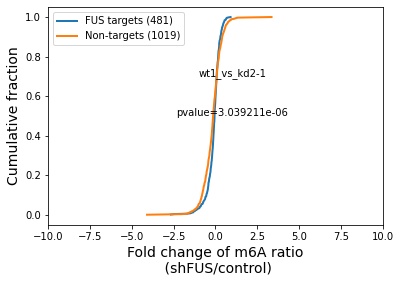

wt2_m6ALevel_vs_kd1-2_m6ALevel.bed -0.042371739950184534 -0.08907923021753565 0.0004731534964700357


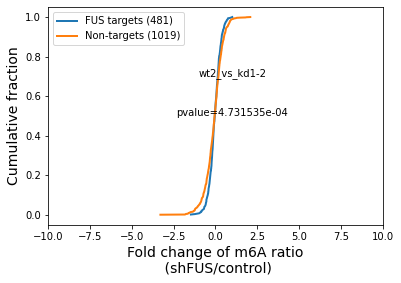

wt1_m6ALevel_vs_kd1-2_m6ALevel.bed -0.200661821457765 -0.2619224501433064 1.3688743778494938e-06


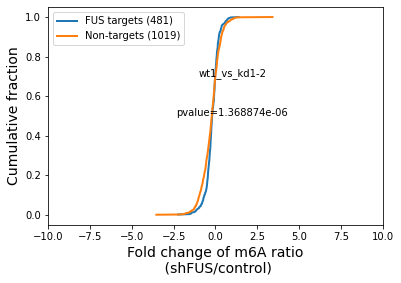

wt1_m6ALevel_vs_kd1-1_m6ALevel.bed -0.1703221361602215 -0.21687762305877284 2.712924158099206e-06


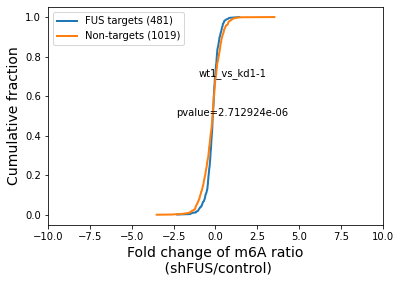

wt2_m6ALevel_vs_kd2-2_m6ALevel.bed 0.10733139172478809 -0.015365294852053039 4.824375562151317e-06


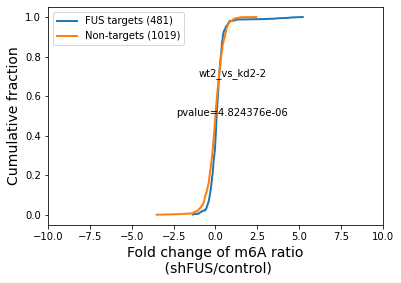

wt2_m6ALevel_vs_kd2-1_m6ALevel.bed 0.048713498451238506 0.0023703753287141007 0.0014235256909935767


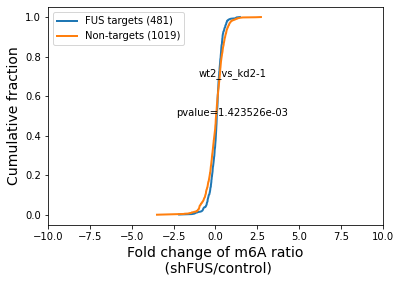

wt2_m6ALevel_vs_kd1-1_m6ALevel.bed -0.012032054652641011 -0.04403440313300206 0.0014742757572056009


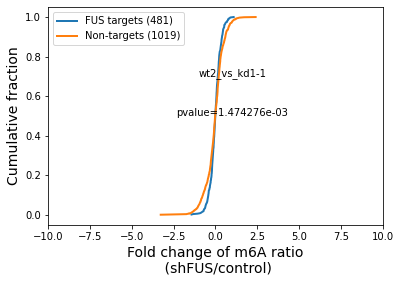

wt1_m6ALevel_vs_kd2-2_m6ALevel.bed -0.050958689782792416 -0.1882085147778238 4.844302736728423e-10


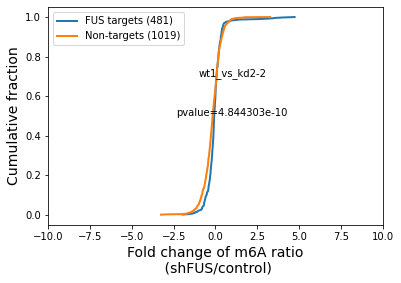

In [26]:
#### compare (kd-test)
import random
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

# target_dir = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/spikeIn/targets/"
# non_dir = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/spikeIn/non-targets/"
# target_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/spikeIn/targets/"
# non_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/spikeIn/non-targets/"
target_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/targets/"
non_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/non-targets/"
# target_dir = "/Charles/project/ASm6A/FUS_regulate/m6A_peak/targets/"
# non_dir = "/Charles/project/ASm6A/FUS_regulate/m6A_peak/non-targets/"
# target_dir = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/totalReads/targets/"
# non_dir =    "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/totalReads/non-targets/"

# target_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/targets/"
# non_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/non-targets/"
# target_list = glob.glob("%s/*.bed" % target_dir)

# def get_fc_list(in_file):
#     df = pd.read_table(in_file, header=None)
#     df = df.dropna()
#     fc_list = df.iloc[:,3].tolist()
#     fc_list = [x for x in fc_list if x != "nan"]
# #     fc_list = [np.log2(x+1) for x in fc_list]
#     return fc_list
def get_fc_list(in_file):
    df = pd.read_table(in_file, header=None)
    ###
    df = df.replace(-np.inf, np.nan)
    df = df.replace(np.inf, np.nan)
    df = df.dropna()
    df['fc'] = df.iloc[:,4] /df.iloc[:,3]
    fc_list = df['fc'].tolist()
    fc_list = [np.log2(x) for x in fc_list]
    return fc_list
    
# for target_file in target_list:
#     non_file = os.path.join(non_dir, os.path.basename(target_file))
#     t_list, n_list = get_fc_list(target_file), get_fc_list(non_file)
# #     n_list = random.sample(n_list, len(t_list))
#     (ks_stat, pval) = stats.ks_2samp(t_list, n_list)
#     if np.mean(t_list) > np.mean(n_list):
#         print(os.path.basename(target_file), np.mean(t_list), np.mean(n_list), ks_stat, pval)
file_list = [os.path.basename(x) for x in glob.glob("%s/*.bed" % target_dir)]
for sample in file_list:
    target_file = os.path.join(target_dir, sample)
    non_file = os.path.join(non_dir, sample)
    t_list, n_list = get_fc_list(target_file), get_fc_list(non_file)
    ####
#     n_list = random.sample(n_list, len(t_list))
    (ks_stat, pval) = stats.ks_2samp(t_list, n_list)
    print(os.path.basename(target_file), np.mean(t_list), np.mean(n_list), pval)

    x_asm6a, y_asm6a = dcst.ecdf(t_list)
    x, y = dcst.ecdf(n_list)
    _ = plt.plot(x_asm6a, y_asm6a, lw = 2)
    _ = plt.plot(x, y, lw = 2) # linestyle='--', 
    _ = plt.legend(("FUS targets (%d)"% len(t_list), "Non-targets (%d)" % len(n_list)))
    _ = plt.xlabel('Fold change of m6A ratio\n (shFUS/control)', size = 14) # Log2 
    _ = plt.ylabel('Cumulative fraction', size = 14)
    _ = plt.text(1, 0.5, 'pvalue=%e'%pval, horizontalalignment='center')
    wt_name, kd_name = sample.split("_")[0], sample.split("_")[-2]
    _ = plt.text(1, 0.7, "%s_vs_%s" % (wt_name, kd_name), horizontalalignment='center')
    _ = plt.xlim((-10,10))
    plt.show()

934 934
542 542


/home/galaxy/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


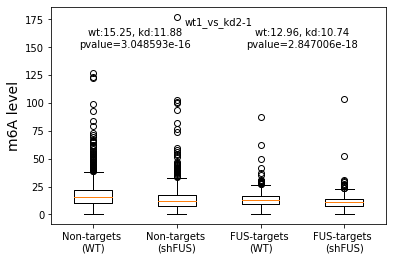

972 972
543 543


/home/galaxy/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


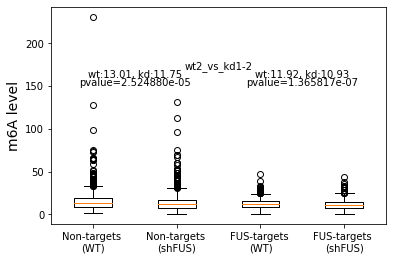

949 949
542 542


/home/galaxy/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


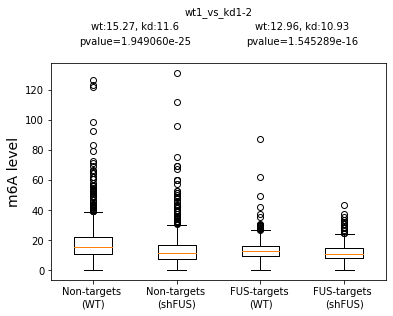

949 949
541 541


/home/galaxy/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


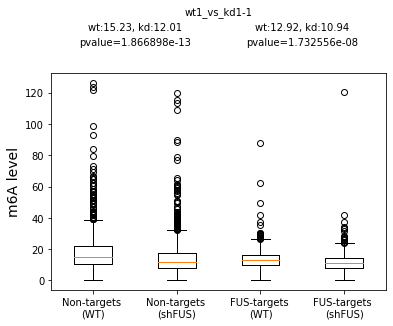

946 946
540 540


/home/galaxy/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


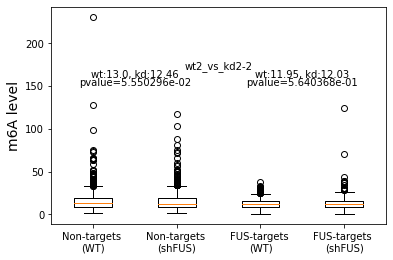

949 949
543 543


/home/galaxy/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


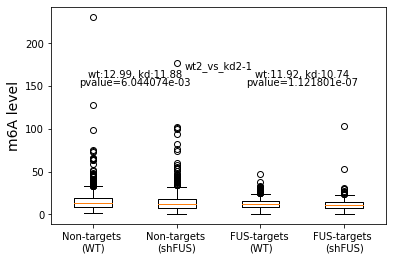

960 960
542 542


/home/galaxy/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


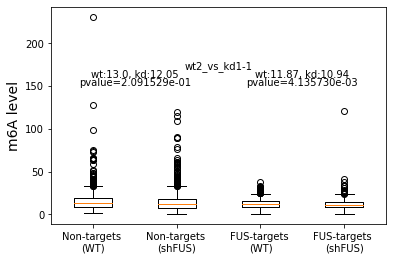

932 932
539 539


/home/galaxy/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


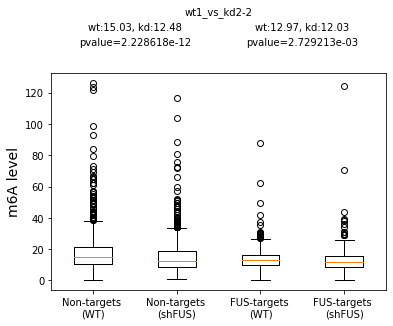

In [6]:
# boxplot 
#### another form of plot
from scipy import stats
import matplotlib.pyplot as plt

# target_dir = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/spikeIn/targets/"
# non_dir = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/spikeIn/non-targets/"
# target_dir = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/totalReads/targets/"
# non_dir = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/totalReads/non-targets/"
# target_dir = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/spikeIn/targets/"
# non_dir = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/spikeIn/non-targets/"
# target_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/targets/"
# non_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/totalReads/non-targets/"
target_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/spikeIn/targets/"
non_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/spikeIn/non-targets/"

def get_fc_list(in_file):
    df = pd.read_table(in_file, header=None)
    df = df.replace(-np.inf, np.nan)
    df = df.replace(np.inf, np.nan)
    df = df.dropna()
    wt_list = df.iloc[:,3].tolist()
#     wt_list = [x for x in wt_list if x != "nan"]
    kd_list = df.iloc[:,4].tolist()
#     kd_list = [x for x in kd_list if x != "nan"]
#     fc_list = [np.log2(x+1) for x in fc_list]
    return wt_list, kd_list
    
# for target_file in target_list:
#     non_file = os.path.join(non_dir, os.path.basename(target_file))
#     #
#     n_wt_list, n_kd_list = get_fc_list(non_file)
#     stat, pvalue = stats.mannwhitneyu(n_wt_list, n_kd_list)
#     a1,b1,c1,d1 = round(np.mean(n_wt_list),2), round(np.mean(n_kd_list),2), round(stat,2), round(pvalue,4)
#     #
#     t_wt_list, t_kd_list = get_fc_list(target_file)
#     stat, pvalue = stats.mannwhitneyu(t_wt_list, t_kd_list)
#     a2,b2,c2,d2 = round(np.mean(t_wt_list),2), round(np.mean(t_kd_list),2), round(stat,2), round(pvalue,4)
#     print(os.path.basename(target_file), a1,b1,d1, a2,b2,d2)
file_list = [os.path.basename(x) for x in glob.glob("%s/*.bed" % target_dir)]
for sample in file_list:
    # sample = "T1_m6ALevel.bed"
    target_file = os.path.join(target_dir, sample)
    non_file = os.path.join(non_dir, sample)
    ##
    n_wt_list, n_kd_list = get_fc_list(non_file)
    # print(np.median(n_wt_list), np.median(n_kd_list))
    n_median = "wt:%s, kd:%s" % (str(round(np.median(n_wt_list),2)), str(round(np.median(n_kd_list),2)))
    n_stat, n_pvalue = stats.ttest_rel(n_wt_list, n_kd_list)
    print(len(n_wt_list), len(n_kd_list))
    ##
    t_wt_list, t_kd_list = get_fc_list(target_file)
    # print(np.median(t_wt_list), np.median(t_kd_list))
    t_median = "wt:%s, kd:%s" % (str(round(np.median(t_wt_list),2)), str(round(np.median(t_kd_list),2)))
    t_stat, t_pvalue = stats.ttest_rel(t_wt_list, t_kd_list)
    print(len(t_wt_list), len(t_kd_list))
    ####
    x = [n_wt_list,n_kd_list,t_wt_list,t_kd_list]
    plt.boxplot(x, labels=["Non-targets \n(WT)","Non-targets \n(shFUS)","FUS-targets \n(WT)","FUS-targets \n(shFUS)"])
    plt.ylabel('m6A level', size = 14)
    plt.xticks(rotation=0)
    plt.text(1.5, 150, 'pvalue=%e'%n_pvalue, horizontalalignment='center')
    plt.text(1.5, 160, n_median, horizontalalignment='center')
    plt.text(3.5, 150, 'pvalue=%e'%t_pvalue, horizontalalignment='center')
    plt.text(3.5, 160, t_median, horizontalalignment='center')
    wt_name, kd_name = sample.split("_")[0], sample.split("_")[-2]
    plt.text(2.5, 170, "%s_vs_%s"% (wt_name, kd_name), horizontalalignment='center')
    plt.show()
#     plt.close()
#     plt.savefig("")

#### Hypothesis test (paired t test)

In [13]:
from scipy import stats

in_file = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/mapping/human/bam/peak_quan/spikeIn/m6A_level_Forplot.txt"
df = pd.read_table(in_file) # , header=None
## remove inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
wt_cols = ['NC_ratio']
kd_cols = ['T1_ratio', 'T2_ratio', 'T3_ratio']
### 
# df['wt'] = (df.iloc[:,3].astype(float) + df.iloc[:,4].astype(float))/2
df['wt'] = df[wt_cols].mean(axis=1)
df['kd'] = df[kd_cols].mean(axis=1)
wt_list = [float(x) for x in df['wt'].tolist()]
kd_list = [float(x) for x in df['kd'].tolist()]
up_list, down_list = [], []
for i in range(len(wt_list)):
    if wt_list[i] < kd_list[i]:
        if (kd_list[i] - wt_list[i]) > (wt_list[i]*0.3):
            up_list.append(1)
    elif wt_list[i] > kd_list[i]:
        if (wt_list[i] - kd_list[i]) > (kd_list[i]*0.3):
            down_list.append(1)
print(len(up_list), len(down_list))
# for wt in wt_cols:
#     for kd in kd_cols:
#         print(wt, kd)
#         wt_list = [float(x) for x in df[wt].tolist()]
#         kd_list = [float(x) for x in df[kd].tolist()]
#         assert len(wt_list) == len(kd_list)
#         print(sum(wt_list)/len(wt_list), sum(kd_list)/len(kd_list))
#         print(stats.ttest_ind(wt_list, kd_list)) # wilcoxon

10455 59


In [4]:
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection

os.chdir("/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/diff_peak/")

m6a = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/peak_quan/m6A_level.txt"
df = pd.read_table(m6a)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

pvalue_list = []
for a,values in df.iterrows():
    t, pvalue = stats.ttest_ind([values['wt1_ratio'],values['wt2_ratio']], [values['kd2-1_ratio'], values['kd2-2_ratio']])
    pvalue_list.append(pvalue)
qvalue_list = list(fdrcorrection(pvalue_list, method="indep")[1])
df['FC'] = ((df['kd2-1_ratio']+df['kd2-2_ratio'])/2) / ((df['wt1_ratio']+df['wt2_ratio'])/2)
df['pvalue'] = pvalue_list
df['qvalue'] = qvalue_list
print(df.head())
df.to_csv("total.bed", sep="\t", header=False, index=False)
df_down = df[(df['pvalue'] < 0.05) & (df['FC'] <0.67)] # 
df_up = df[(df['pvalue'] < 0.05) & (df['FC'] >1.5)] # 
df_down.to_csv("down.bed", sep="\t", header=False, index=False)
df_up.to_csv("up.bed", sep="\t", header=False, index=False)
print(len(df_down), len(df_up))
# print(pvalue_list)

  #chro   start     end  wt1_ratio  wt2_ratio  kd1-1_ratio  kd1-2_ratio  \
0  chr1   14411   14829  11.449180   7.814543     8.606321     5.661656   
1  chr1  788751  789941  30.889809  32.484208    21.233054    13.076497   
2  chr1  791535  792683  19.558242  11.478645    20.655171    20.014380   
3  chr1  847684  848533  33.386433  20.725727    15.199027    18.241849   
4  chr1  854814  856396  14.325781   6.638942    12.869679     6.398100   

   kd2-1_ratio  kd2-2_ratio        FC    pvalue    qvalue  
0     6.188052     6.080192  0.636857  0.194276  0.578330  
1    23.746348    24.636332  0.763447  0.014514  0.578330  
2     8.612423    14.705860  0.751309  0.525309  0.644729  
3    16.162058    48.487718  1.194737  0.790149  0.842765  
4     7.540831     7.679306  0.725988  0.532842  0.649182  
515 11


#### MeTDiff: parse bed12 results

In [21]:
# os.chdir("/home/galaxy/project/alleleSpecific_analysis/data/shFUS/peak/diff_peaks/KOvsWT_MeTDiff/")
os.chdir("/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/peak_calling/diffPeak/MeTDiff/T3_VS_NC/")
in_file = "diff_peak.xls"
in_bed = "diff_peak.bed"
###################################
df = pd.read_table(in_file)
# df.head()
up_names = df[df['diff.log2.fc'] > 0]['name'].tolist()
down_names = df[df['diff.log2.fc'] < 0]['name'].tolist()
df = pd.read_table(in_bed)
df_up = df[df['name'].isin(up_names)]
df_down = df[df['name'].isin(down_names)]
df_up.to_csv("up_diffpeak.bed", sep="\t", index=False)
df_down.to_csv("down_diffpeak.bed", sep="\t", index=False)
#
os.system("bed12ToBed6 -i up_diffpeak.bed > up_diffpeak.bed6")
os.system("bed12ToBed6 -i down_diffpeak.bed > down_diffpeak.bed6")

0

In [ ]:
##### pick out m6A contained both in wt and kd samples.
# def overlap_twoSamples(bed1, bed2, bed3):
#     tmp_file = "tmp_overlap.txt"
#     os.system("bedtools intersect -a %s -b %s %s -wa -wb -filenames > %s" %
#               (bed1, bed2, bed3, tmp_file))
#     df = pd.read_table(tmp_file, sep="\t", header=None)
#     df['term']=df.iloc[:,0]+";"+df.iloc[:,1].astype(str)+";"+df.iloc[:,2].astype(str)+";"+df.iloc[:,3].astype(str)+";"+df.iloc[:,4].astype(str)
#     df['file'] = df.iloc[:,5]
#     overlap_dict = {}
#     for i, values in df[['term','file']].iterrows():
#         overlap_dict[values['term']] = overlap_dict.get(values['term'], []) + [values['file']]
#     array_list = []
#     for x,y in overlap_dict.items():
#         if len(set(y)) > 1:
#             array_list.append(x.split(";"))
#     df_both = pd.DataFrame(array_list)
#     result_file = "%s_%s_m6A.txt" % (bed2.split("/")[-2], bed3.split("/")[-2])
#     df_both.dropna().to_csv(result_file, sep="\t", header=False, index=False)
#     os.system("rm %s" % tmp_file)
#     return result_file